# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.model_evaluation import model_evaluation_precise
from ml_project_util.history import concatenate_json, plot_json

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-__cmp806
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-__cmp806
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit cb04cae83ee57d134658765811e153245b1cf241
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22731 sha256=ec08a051d657a792f8c358eb6af0ca1e45ebac860ff3c73770b93734fb342406
  Stored in directory: /tmp/pip-ephem-wheel-cache-foz4xz2f/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-06-19 10:01:04.412812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750327264.627043      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750327264.689947      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='stanford-dogs-restructured') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: stanford-dogs-restructured


## Define the Model

In [3]:
saved_model_name = 'SD1_P2_035_val1.0895'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/sd1_p1/keras/default/1/SD1_P2_035_val1.0895.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1750327282.163284      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

I0000 00:00:1750327300.585014      92 service.cc:148] XLA service 0x7f65f8011090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750327300.585735      92 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750327301.113611      92 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/310 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.6875 - loss: 0.9437   

I0000 00:00:1750327310.699792      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.5209 - loss: 1.6932
Epoch 1: saving model to /kaggle/working/SavedModels/SD1/SD1_P2_FT1_001_val1.2035.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 163s 481ms/step - accuracy: 0.5210 - loss: 1.6930 - val_accuracy: 0.6353 - val_loss: 1.2035
Epoch 2/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6145 - loss: 1.3416
Epoch 2: saving model to /kaggle/working/SavedModels/SD1/SD1_P2_FT1_002_val1.2112.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 136s 438ms/step - accuracy: 0.6145 - loss: 1.3416 - val_accuracy: 0.6406 - val_loss: 1.2112
Epoch 3/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.6418 - loss: 1.1859
Epoch 3: saving model to /kaggle/working/SavedModels/SD1/SD1_P2_FT1_003_val1.0856.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 136s 437ms/step - accuracy: 0.6418 - loss: 1.1859 - val_accuracy: 0.6700 - val_loss: 1.0856
Epoch 4/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.6898 - loss: 1.0460
Epoch 4: saving model to /kaggle

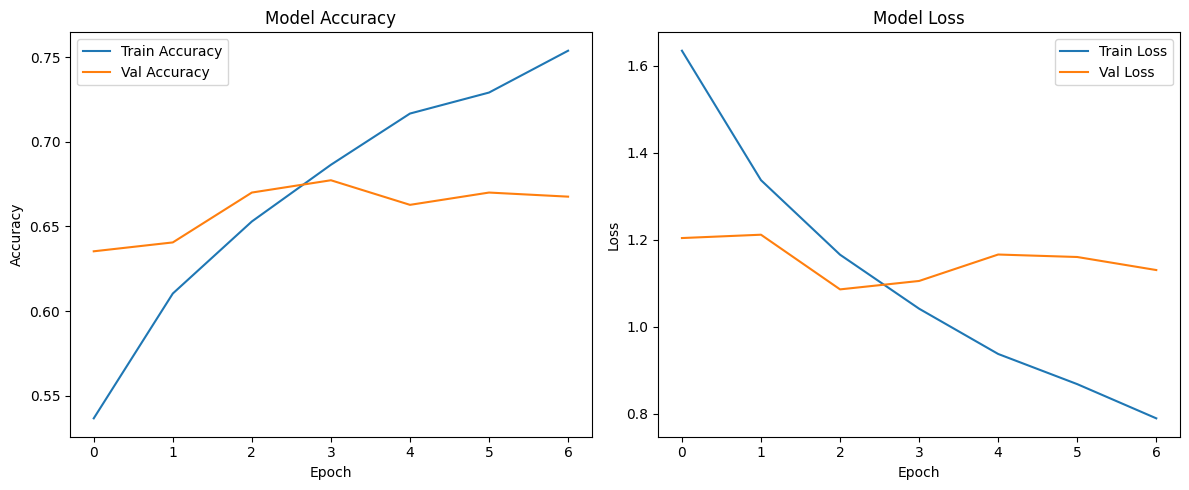

In [4]:
model_name = 'SD1_P2_FT1'
epochs = 30
lr = 1e-4
optimizer = 'Adam'

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
    layers.RandomContrast(0.05)
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.69029
Precise test loss: 1.15542


(0.69028664, 1.1554242550027645)

In [6]:
saved_model_name = 'SD1_P2_035_val1.0895'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/sd1_p1/keras/default/1/SD1_P2_035_val1.0895.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

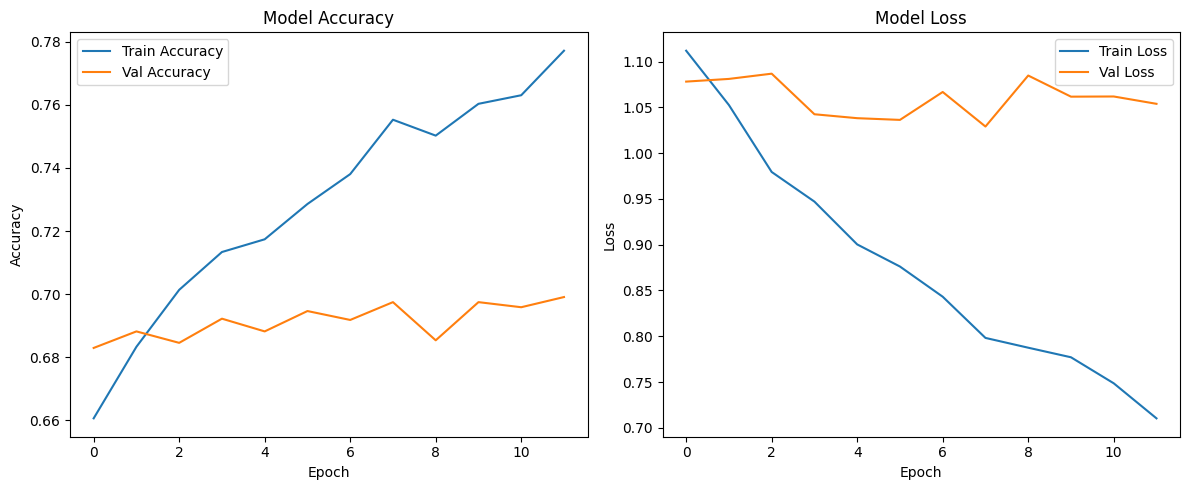

In [7]:
model_name = 'SD1_P2_FT2'
epochs = 35
lr = 1e-5
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.71875
Precise test loss: 1.06677


(0.71875, 1.0667734059748377)

In [9]:
saved_model_name = 'SD1_P2_035_val1.0895'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/sd1_p1/keras/default/1/SD1_P2_035_val1.0895.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

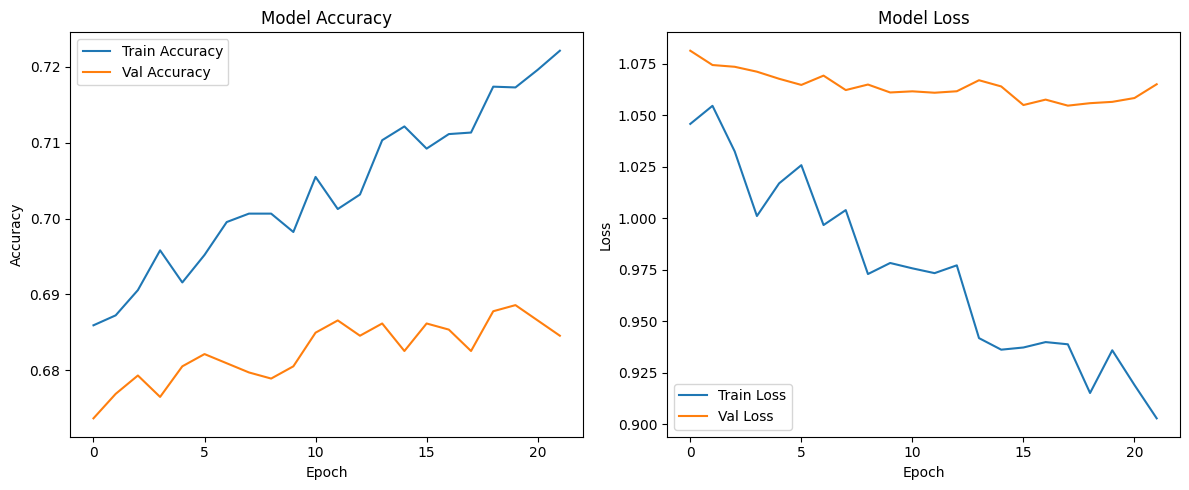

In [10]:
model_name = 'SD1_P2_FT3'
epochs = 40
lr = 1e-6
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.70104
Precise test loss: 1.07566


(0.701035, 1.075659012208414)

## Interactively Train the Model

In [12]:
# model_name1 = 'EG2_P1_FT1'
# epochs = 5
# lr = 1e-4
# optimizer = 'Adam'

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ], name="data_augmentation")

# freeze_layers(model, verbose=1)
# unfreeze_head(model, verbose=1)
# unfreeze_block(model, verbose=1)
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation)

In [13]:
# model_name2 = 'EG2_P1_FT1_2'
# epochs = 5
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation)

In [14]:
# relpath1 = f"{PATH_RAWDATA}/{model_name1}.json"
# relpath2 = f"{PATH_RAWDATA}/{model_name2}.json"
# output_filename = f"{model_name1}_a"
# concatenate_json(relpath1, relpath2, output_filename)
# plot_json(json_name=output_filename, img_name=output_filename, data_type='joined')